<a href="https://colab.research.google.com/github/AdithyaDVarma/Biology_AI-in-agriculture_Semester1/blob/main/Salary_Prediction_AIE_B_Project_Sem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [504]:
# importing the necessary modules and packages
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf

**DATA HANDLING**

In [505]:
#Creating the YearsExperience vs Salary data using training set csv
import csv
import random
f=open("Trainingset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,(age+exp)*educ,sal])
f.close()

f=open("Testset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,(age+exp)*educ,sal])
f.close()




In [506]:
# Initializing the trainingset and testset data objects using pandas
Testset = pd.read_csv("Testset.csv")
Training = pd.read_csv("Trainingset.csv") 

#The head() function is used to get the first few rows
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584


In [507]:
# Using the data object  to find some general values like mean, minimum etc
Testset.describe()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,57.790347,16.012303,5.848958,261.879988,431.720268,74722.675008
std,4.238510,2.348378,1.893250,75.330560,143.462851,13711.392975
min,51.071955,12.016612,3.000000,144.398970,195.266739,50500.898895
25%,53.896515,14.191721,4.000000,201.404977,322.079292,64188.055340
50%,57.911842,16.073281,6.000000,258.351431,416.789514,75529.136035
75%,61.155526,17.922335,7.000000,321.210549,534.093361,85166.312765
max,64.958849,19.977688,9.000000,399.108020,729.705119,99908.930183


In [508]:
# corr() is used to find the pairwise correlation of all columns in the data we provided.
# The closer its value is to 1, the more variability the model explains.
Testset.corr()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary
Age,1.000000,-0.044614,0.053063,-0.046657,0.222745,-0.076086
YearsExperience,-0.044614,1.000000,-0.084095,0.997660,-0.000872,-0.034491
Years of Education,0.053063,-0.084095,1.000000,-0.090343,0.979535,-0.187072
QYearsExperience,-0.046657,0.997660,-0.090343,1.000000,-0.007911,-0.023595
CombinedParameter,0.222745,-0.000872,0.979535,-0.007911,1.000000,-0.197605
Salary,-0.076086,-0.034491,-0.187072,-0.023595,-0.197605,1.000000


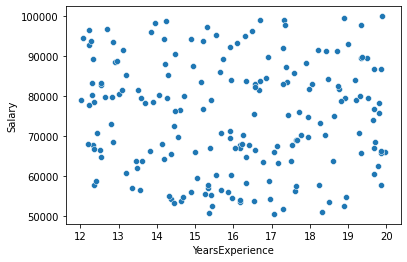

In [509]:
# We are using seaborn, which is used to display mathematical scatter plot of the given data
sns.scatterplot(data=Testset, x="YearsExperience",y="Salary")

In [510]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["YearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["YearsExperience"]])

In [511]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,79154.148785
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,74493.701655
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,77280.680750
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,79096.480075
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,75535.978605


In [512]:
# Created a new column to show the error current salary minus predicted salary
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,79154.148785,-11435.848844
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,74493.701655,15072.566709
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,77280.680750,6096.723578
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,79096.480075,-8378.248701
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,75535.978605,-5194.591021


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

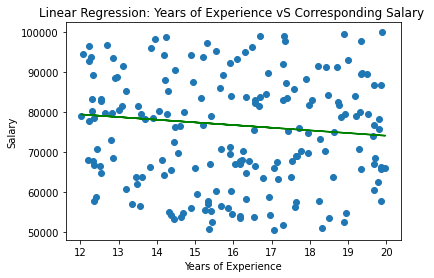

In [513]:
# Plotting Linear Regression graph with Sklearn  
plt.scatter(Testset["YearsExperience"], Testset["Salary"])
plt.plot(Testset["YearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

In [514]:
m=lm.coef_

In [515]:
b=lm.intercept_

In [516]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[82709.54946076]])

In [517]:
lm.predict([[7]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[82709.54946076]])

In [518]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


AGE VS SALARY CONDITION

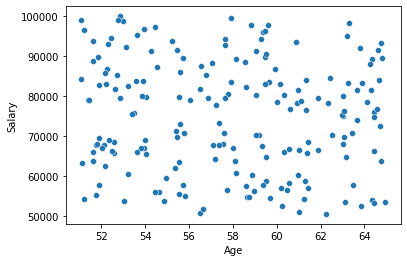

In [519]:
sns.scatterplot(data=Testset, x="Age",y="Salary")

In [520]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Age"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Age"]])

In [521]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,78353.749537,-10635.449597
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,74112.769176,15453.499188
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,75838.439652,7538.964676
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,74567.754566,-3849.523192
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,74874.183449,-4532.795865


Text(0.5, 1.0, 'Linear Regression: Age vS Corresponding Salary ')

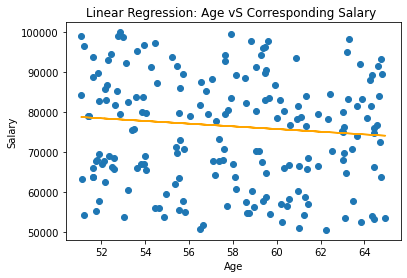

In [522]:
plt.scatter(Testset["Age"], Testset["Salary"])
plt.plot(Testset["Age"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Linear Regression: Age vS Corresponding Salary ")

In [523]:
m=lm.coef_

In [524]:
b=lm.intercept_

In [525]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[93492.54811139]])

In [526]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[93492.54811139]])

In [527]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


YEARS OF EDUCATION VS SALARY

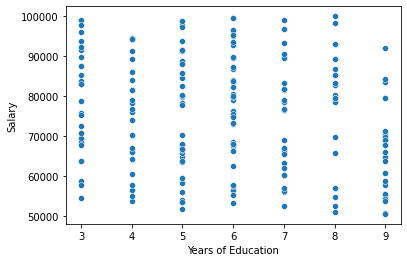

In [528]:
sns.scatterplot(data=Testset, x="Years of Education",y="Salary")

In [529]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Years of Education"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Years of Education"]])

In [530]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,76490.796183,-8772.496243
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,76599.402544,12966.865820
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,76925.221627,6452.182701
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,76925.221627,-6206.990252
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,76925.221627,-6583.834043


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

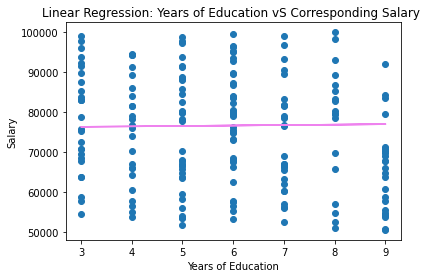

In [531]:
plt.scatter(Testset["Years of Education"], Testset["Salary"])
plt.plot(Testset["Years of Education"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Years of Education")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [532]:
m=lm.coef_

In [533]:
b=lm.intercept_


In [534]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[76708.00890491]])

In [535]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[76708.00890491]])

In [536]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


THREE PARAMETERS VS SALARY


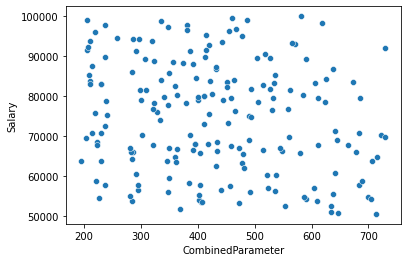

In [537]:
sns.scatterplot(data=Testset, x="CombinedParameter",y="Salary")

In [538]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["CombinedParameter"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["CombinedParameter"]])

In [539]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,76702.372100,-8984.072160
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,76537.936140,13028.332224
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,76386.044862,6991.359467
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,76377.402941,-5659.171567
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,76341.454001,-6000.066417


Text(0.5, 1.0, 'Linear Regression: Combined Parameters vS Corresponding Salary ')

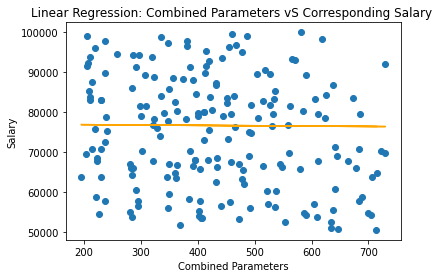

In [540]:
plt.scatter(Testset["CombinedParameter"], Testset["Salary"])
plt.plot(Testset["CombinedParameter"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Combined Parameters")
plt.title("Linear Regression: Combined Parameters vS Corresponding Salary ")

In [541]:
m=lm.coef_

In [542]:
b=lm.intercept_

In [543]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[76986.8374412]])

In [544]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[76986.8374412]])

In [545]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


QUADRATIC YEARS OF EDUCATION VS SALARY


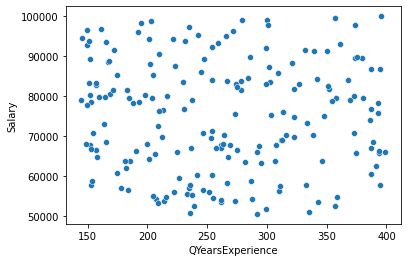

In [546]:
sns.scatterplot(data=Testset, x="QYearsExperience",y="Salary")

In [547]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["QYearsExperience"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["QYearsExperience"]])

In [548]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,52.140804,12.334416,5,152.137818,322.376099,67718.299941,79034.647296,-11316.347356
1,64.786541,19.326810,6,373.525601,504.680106,89566.268364,74345.850059,15220.418304
2,59.640944,15.145311,9,229.380445,673.076293,83377.404328,77398.716852,5978.687476
3,63.429867,12.420940,9,154.279761,682.657267,70718.231374,78989.282857,-8271.051483
4,62.516159,17.763009,9,315.524506,722.512514,70341.387584,75574.261893,-5232.874309


Text(0.5, 1.0, 'Linear Regression: Years of experience vS Corresponding Salary ')

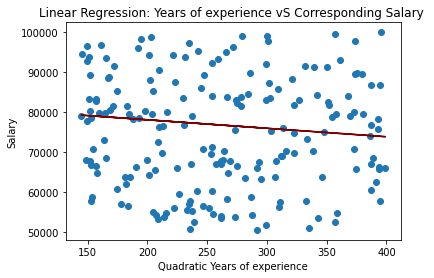

In [549]:
plt.scatter(Testset["QYearsExperience"], Testset["Salary"])
plt.plot(Testset["QYearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="maroon")
plt.ylabel("Salary")
plt.xlabel("Quadratic Years of experience")
plt.title("Linear Regression: Years of experience vS Corresponding Salary ")

In [550]:
m=lm.coef_

In [551]:
b=lm.intercept_

In [552]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[82108.53779696]])

In [553]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[82108.53779696]])

In [554]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
